In [33]:
import sys
# sys.path.insert(0, '..')
from src.utils import local_dist
import os
import pickle
from src.GGWR_Model import GGWR_Model
import matplotlib.pyplot as plt
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import src.utils as utils
import warnings
import time
import numpy as np
from src.hyperband import Hyperband
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
dataset = "kingHousePrices"
path = "../../Data/" + dataset + "/"

with open(path + 'training_idx.data', 'rb') as filehandle:
    training_idx = pickle.load(filehandle)
with open(path + 'validation_idx.data', 'rb') as filehandle:
    validation_idx = pickle.load(filehandle)
with open(path + 'test_idx.data', 'rb') as filehandle:
    test_idx = pickle.load(filehandle)
with open(path + 'x.data', 'rb') as filehandle:
    x = pickle.load(filehandle)
with open(path + 'y.data', 'rb') as filehandle:
    y = pickle.load(filehandle)
with open(path + 'coords.data', 'rb') as filehandle:
    coords = pickle.load(filehandle)

X_training, X_validation, X_test = x[training_idx, :], x[validation_idx], x[test_idx, :]
y_training, y_validation, y_test = y[training_idx, :], y[validation_idx], y[test_idx, :]
coords_training, coords_validation, coords_test = coords[training_idx], coords[validation_idx], coords[test_idx]


kernelFuncs = ['triangular', 'uniform', 'quadratic', 'quartic', 'gaussian', 'bisquare', 'exponential']
point = 2
ggwr = GGWR_Model(X_training, X_validation, y_training, y_validation, coords_training, coords_validation, -1, kernelFuncs[4], True, False)
ggwr.bandwidths = [43, 64, 43, 85, 48, 71, 51, 58]

for each point we show how a bandwidth distributes weights


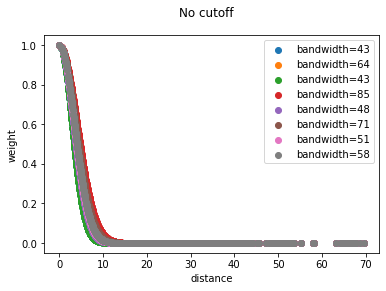

In [23]:
print("for each point we show how a bandwidth distributes weights")
wi = ggwr._build_wi(point, ggwr.bandwidths, "training", list(range(ggwr.train_len)))
plt.suptitle('No cutoff')
for i in range(len(ggwr.bandwidths)):
    plt.scatter(ggwr.training_distances[point, :], wi[:, i], label='bandwidth='+str(ggwr.bandwidths[i]))
    plt.xlabel('distance')
    plt.ylabel('weight')
plt.legend()
plt.show()

for a point we show what will be the point where we cut below 10% of weight


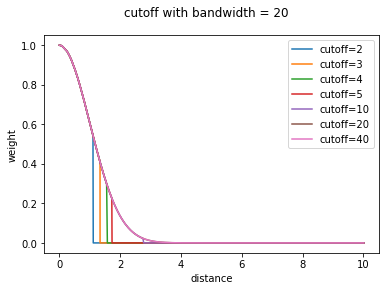

In [4]:
print("for a point we show what will be the point where we cut below 10% of weight")

plt.suptitle('cutoff with bandwidth = 20')
cutoffs = [2, 3, 4, 5, 10, 20, 40]
for i in range(len(cutoffs)):
    ggwr.cutoff = cutoffs[i]
    wi = ggwr._build_wi(point, [20], "training", list(range(ggwr.train_len)))
    idx = np.argsort(ggwr.training_distances[point, :])
    plt.plot(ggwr.training_distances[point, idx], wi[idx], label='cutoff='+str(cutoffs[i]))
    plt.xlabel('distance')
    plt.ylabel('weight')
plt.legend()
plt.show()

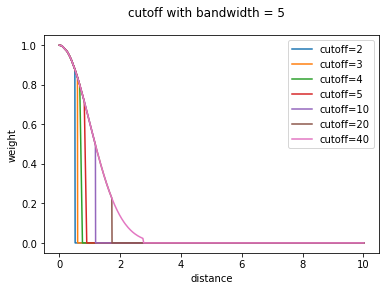

In [5]:
plt.suptitle('cutoff with bandwidth = 5')
for i in range(len(cutoffs)):
    ggwr.cutoff = cutoffs[i]
    wi = ggwr._build_wi(point, [5], "training", list(range(ggwr.train_len)))
    idx = np.argsort(ggwr.training_distances[point, :])
    plt.plot(ggwr.training_distances[point, idx], wi[idx], label='cutoff='+str(cutoffs[i]))
    plt.xlabel('distance')
    plt.ylabel('weight')
plt.legend()
plt.show()

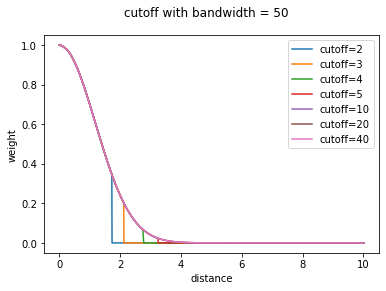

In [6]:
plt.suptitle('cutoff with bandwidth = 50')
for i in range(len(cutoffs)):
    ggwr.cutoff = cutoffs[i]
    wi = ggwr._build_wi(point, [50], "training", list(range(ggwr.train_len)))
    idx = np.argsort(ggwr.training_distances[point, :])
    plt.plot(ggwr.training_distances[point, idx], wi[idx], label='cutoff='+str(cutoffs[i]))
    plt.xlabel('distance')
    plt.ylabel('weight')
plt.legend()
plt.show()

In [7]:
# comparing the effect of cutoff on error value

# ggwr.bandwidths = [50 for _ in range(ggwr.numberOfFeatures)]
# ggwr.cutoff = -1
# warnings.simplefilter(action='ignore', category=FutureWarning)
# predictions = ggwr.predict(coords_test, X_test)
# print("the GGWR_Model prediction error is equal to: ", utils.R2(y_test, predictions))
#
# for i in range(len(cutoffs)):
#     warnings.simplefilter(action='ignore', category=FutureWarning)
#     ggwr.cutoff = cutoffs[i]
#     predictions = ggwr.predict(coords_test, X_test)
#     print("the GGWR_Model prediction with cutoff =", cutoffs[i], "error is equal to: ", utils.R2(y_test, predictions))


# comparing the effect of bandwidth
# a = [58, 58, 58, 58, 58, 58, 58, 58]  # 0.139
# b = [43, 64, 43, 85, 48, 71, 51, 52]  # 8.1
# print(ggwr.cutoff)
# ggwr.cutoff = -1
# B = ggwr.fit(a, "validation")
# valid_pred = utils.calculate_dependent(B, ggwr.X_validation)
# error = utils.R2(ggwr.y_validation, valid_pred)
# print(error)
# ggwr.bandwidths = a
# predictAll = ggwr.predict(coords, x)
# with open(path + '/Test1_predictAll.data', 'wb') as filehandle:
#     pickle.dump(predictAll, filehandle)
#
# B = ggwr.fit(b, "validation")
# valid_pred = utils.calculate_dependent(B, ggwr.X_validation)
# error = utils.R2(ggwr.y_validation, valid_pred)
# print(error)
# ggwr.bandwidths = b
# predictAll = ggwr.predict(coords, x)
# with open(path + '/Test2_predictAll.data', 'wb') as filehandle:
#     pickle.dump(predictAll, filehandle)

..\GGWR_Model.py:77: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if data == "training":
..\GGWR_Model.py:79: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif data == "validation":
..\GGWR_Model.py:77: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if data == "training":
..\GGWR_Model.py:79: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif data == "validation":
..\GGWR_Model.py:77: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if data == "training":
..\GGWR_Model.py:79: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementw

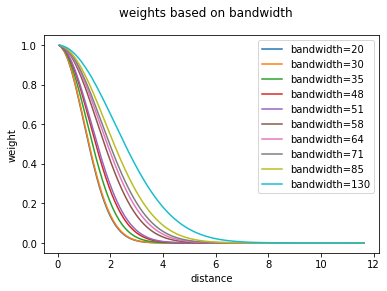

In [8]:
plt.suptitle('weights based on bandwidth')
ggwr.bandwidths = np.sort([20, 30, 130, 64, 35, 85, 48, 71, 51, 58])
for i in range(len(ggwr.bandwidths)):
    ggwr.cutoff = -1
    wi = ggwr._build_wi(point, [ggwr.bandwidths[i]], coords_test[point], list(range(len(coords_training))))
    dist = local_dist(coords_test[point], ggwr.coords_training[list(range(ggwr.train_len))], ggwr.spherical).reshape(-1)
    idx = np.argsort(dist)
    plt.plot(dist[idx], wi[idx], label='bandwidth='+str(ggwr.bandwidths[i]))
    plt.xlabel('distance')
    plt.ylabel('weight')
plt.legend()
plt.show()

In [39]:
point = 1088
b1 = [19, 19, 19, 19, 19, 19, 19, 20, 19]
b2 = [15, 15, 15, 15, 15, 15, 15, 15, 15]
wi1 = ggwr._build_wi(point, b1, coords[point], list(range(len(coords_training))))
wi2 = ggwr._build_wi(point, b2, coords[point], list(range(len(coords_training))))
indices = np.asarray(list(range(ggwr.train_len)))
B1 = ggwr._local_fit(point, b1, coords[point], indices)
B2 = ggwr._local_fit(point, b2, coords[point], indices)
print(B1)
print(B2)
print(np.round(np.sum(B1*x[point,:])), y[point])


[[457055.2858704   -3599.59606948  -3597.4619487  128473.31508901
  -52400.87656407   2330.20541755  31114.84750783 153302.70590534
  -41077.79632828]]
[[446072.6782507    3525.47798649  -8472.41141573 118836.82965961
  -60268.72401472   4126.64276175  31053.85346437 143399.03235861
  -31178.72270855]]
-77114.0 [220000.]


In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = X_training
# y = 1 * x_0 + 2 * x_1 + 3
y = y_training
reg = LinearRegression().fit(X, y)
print(reg.coef_)
predictions = reg.predict(X_test)
print("the GGWR_Model prediction error is equal to: ", utils.R2(y_test, predictions))


[[     0.         -20137.60239858  29321.18686886 112934.97452089
  -17001.88868898  20222.19799048  16006.44456152 120778.92402067
  -90052.5452959 ]]
the GGWR_Model prediction error is equal to:  0.3947482606497002


In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

